<a href="https://colab.research.google.com/github/pavizhi/rnn-stock-price-prediction/blob/main/nn5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers



In [4]:
dataset_train = pd.read_csv('/content/trainset.csv')
dataset_train.columns
dataset_train.head()
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape


(1259, 1)

In [5]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape



(1259, 1)

In [6]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
    X_train_array.append(training_set_scaled[i-60:i,0])
    y_train_array.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_train.shape



(1199, 60)

In [7]:
length = 60
n_features = 1

model = models.Sequential()
model.add(layers.SimpleRNN(10,input_shape=(length,n_features)))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse',metrics ='accuracy')



In [8]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.fit(X_train1,y_train,epochs=100, batch_size=64)



Epoch 1/100
19/19 [==============================] - 3s 33ms/step - loss: 0.1036 - accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 1s 35ms/step - loss: 0.0170 - accuracy: 8.3403e-04
Epoch 3/100
19/19 [==============================] - 1s 65ms/step - loss: 0.0094 - accuracy: 8.3403e-04
Epoch 4/100
19/19 [==============================] - 2s 98ms/step - loss: 0.0071 - accuracy: 8.3403e-04
Epoch 5/100
19/19 [==============================] - 2s 86ms/step - loss: 0.0054 - accuracy: 8.3403e-04
Epoch 6/100
19/19 [==============================] - 2s 82ms/step - loss: 0.0036 - accuracy: 8.3403e-04
Epoch 7/100
19/19 [==============================] - 1s 69ms/step - loss: 0.0032 - accuracy: 8.3403e-04
Epoch 8/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0025 - accuracy: 8.3403e-04
Epoch 9/100
19/19 [==============================] - 1s 72ms/step - loss: 0.0020 - accuracy: 8.3403e-04
Epoch 10/100
19/19 [==============================] - 2s 81ms/st

In [10]:
dataset_test = pd.read_csv('/content/testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape


(125, 1)

In [11]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape

(1324, 60, 1)

B.PAVIZHI 212221230077
42/42 [==============================] - 0s 7ms/step


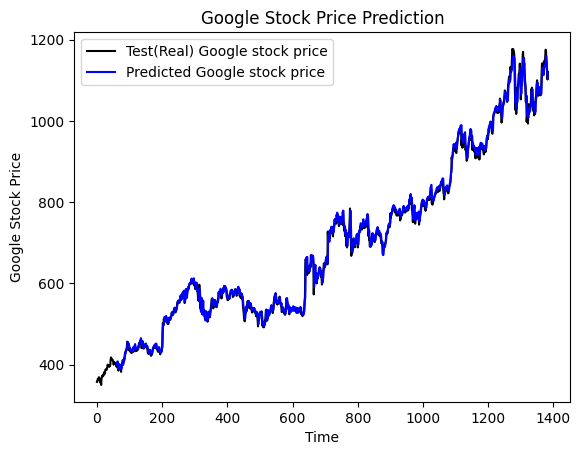

In [13]:
print("B.PAVIZHI 212221230077")
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)
plt.plot(np.arange(0,1384),inputs, color='black', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()